# **Eye Cancer Patients  Jupyter Notebook**

**Section**: S20 <br>

**Group**: pandas Salle

# **Dataset Description**

The chosen data set titled "Eye Cancer Patient Records" provides detailed medical records for 5,000 patients diagnosed with 3 different types of eye cancer namely, Melanoma, Retinoblastoma, and Lymphoma. The dataset was retrieved from Kaggle and is designed for machine learning projects, statistical modeling, and healthcare research.


*Disclaimer*

Since the dataset was sourced from Kaggle and intended for machine learning and research, it may contain selection biases, synthetic data points, or pre-processed values that do not fully represent real-world populations. As a result, insights generated from this data should be interpreted cautiously, as they might not generalize to broader or clinically diverse patient groups.

### **Import the necessary libraries**

For Data Visualization and Data processing


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import ttest_ind


### **Initializing the DataFrame**

Load the Eye Cancer Patients Dataset into a pandas DataFrame


In [82]:
eye_cancer_df = pd.read_csv('eye_cancer_patients.csv')
eye_cancer_df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


### **Break down the attributes**

In [83]:
print(f"Number of observations: {eye_cancer_df.shape[0]}")
print(f"Number of attributes: {eye_cancer_df.shape[1]}")

attribute_descriptions = {
    'Patient_ID': 'Unique identifier for each patient',
    'Age': 'Patient age in years',
    'Gender': 'Gender of the patient (M, F, Other)',
    'Cancer_Type': 'Type of eye cancer (Melanoma, Retinoblastoma, Lymphoma)',
    'Laterality': 'Affected eye(s): Left, Right, Bilateral',
    'Date_of_Diagnosis': 'Date when the cancer was diagnosed',
    'Stage_at_Diagnosis': 'Cancer stage at the time of diagnosis',
    'Treatment_Type': 'Primary treatment given (Surgery, Chemotherapy, Radiation)',
    'Surgery_Status': 'Whether surgery was performed (True/False)',
    'Radiation_Therapy': 'Number of radiation therapy sessions received',
    'Chemotherapy': 'Number of chemotherapy cycles received',
    'Outcome_Status': 'Current health status (Deceased, In Remission, Active)',
    'Survival_Time_Months': 'Survival duration in months',
    'Genetic_Markers': 'Detected genetic markers (e.g. BRAF Mutation)',
    'Family_History': 'Indicates family history of eye cancer (True/False)',
    'Country': 'Country of the patient'
}
attr_df = pd.DataFrame(list(attribute_descriptions.items()), columns=['Attribute', 'Description'])
display(attr_df)


Number of observations: 5000
Number of attributes: 16


,Attribute,Description
0,Patient_ID,Unique identifier for each patient
1,Age,Patient age in years
2,Gender,"Gender of the patient (M, F, Other)"
3,Cancer_Type,"Type of eye cancer (Melanoma, Retinoblastoma, ..."
4,Laterality,"Affected eye(s): Left, Right, Bilateral"
5,Date_of_Diagnosis,Date when the cancer was diagnosed
6,Stage_at_Diagnosis,Cancer stage at the time of diagnosis
7,Treatment_Type,"Primary treatment given (Surgery, Chemotherapy..."
8,Surgery_Status,Whether surgery was performed (True/False)
9,Radiation_Therapy,Number of radiation therapy sessions received


### **Preparing to Clean up the Data**

Check the information regarding the Dataset


In [84]:
eye_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

#### **Data preprocessing**
We will want to remove the `nan` values so that when we do Exploratory Data Analysis later, we will not encounter isues<br>
First let us check if we missed any variables with a `nan` value

In [85]:
nan_variables = eye_cancer_df.columns[eye_cancer_df.isnull().any()].to_list()
print(nan_variables)

['Genetic_Markers']


> For this dataset, it seems like `Genetic_Markers` is the only variable that has a `nan` value, so we may proceed with the cleaning up of the data.

#### **Do we drop or replace the** `nan` **values from** `Genetic_Markers` **variable?**
Dropping the rows with `nan` values in `Genetic_Markers` would be more convenient, but first let us check if we still have sufficient data if ever we drop them<br>
So our task is to count how many of the rows are affected by the `nan` values.

In [86]:
nan_count = eye_cancer_df['Genetic_Markers'].isnull().sum()

print("The count of NaN values in Genetic_Markers is:", nan_count)

The count of NaN values in Genetic_Markers is: 2497


> Let us check the shape of our pandas DataFrame: `eye_cancer_df` 

In [87]:
eye_cancer_df.shape
print("Our Data frame has {} rows and {} columns.".format(eye_cancer_df.shape[0], eye_cancer_df.shape[1]))

Our Data frame has 5000 rows and 16 columns.


> We know we have 5000 observations, and according to the count of our `nan` values in the `Genetic_Markers` variable, 2497 rows are affected by these `nan` values. <br> <br>
> Therefore, we cannot proceed with the dropping since it will affect about half of our observations. <br> <br>
> Instead let us, replace these `nan` values with another categorical data as `None`.

In [88]:
eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'].isnull(), 'Genetic_Markers'] = 'None'

#### **Sanity Check !!**
Let us see if the `nan` values in the `Genetic_Markers` variables have been replace with `None`

In [89]:
replaced = eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'] == 'None', 'Genetic_Markers'].shape[0]
not_replaced = eye_cancer_df['Genetic_Markers'].isnull().sum()
print("The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: {} rows".format(replaced))
print("Meanwhile the number of rows that are still containg nan values is: {} rows".format(not_replaced))

The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: 2497 rows
Meanwhile the number of rows that are still containg nan values is: 0 rows


The `2497` rows that has been successfully replaced with `None` in the `Genetic_Markers` variable is parallel with the number of rows that was originally `nan` values in `Genetic_Markers`

#### **Next let's check if there are misinputted values in our categorical data**
To do this we can loop over the columns of our pandas DataFrame and then check the Unique Values

In [90]:
for col in eye_cancer_df.columns:
    if eye_cancer_df[col].dtype == 'object' and col != 'Date_of_Diagnosis' and col != 'Patient_ID':
        print(f"Unique values in {col}: {eye_cancer_df[col].unique()}")
        print()

Unique values in Gender: ['F' 'Other' 'M']

Unique values in Cancer_Type: ['Retinoblastoma' 'Melanoma' 'Lymphoma']

Unique values in Laterality: ['Left' 'Right' 'Bilateral']

Unique values in Stage_at_Diagnosis: ['Stage IV' 'Stage III' 'Stage II' 'Stage I']

Unique values in Treatment_Type: ['Radiation' 'Chemotherapy' 'Surgery']

Unique values in Outcome_Status: ['Deceased' 'In Remission' 'Active']

Unique values in Genetic_Markers: ['None' 'BRAF Mutation']

Unique values in Country: ['UK' 'Japan' 'Canada' 'USA' 'Australia' 'Germany' 'South Africa' 'Brazil'
 'France' 'India']



> Since the values are to be expected, we can proceed to our EDA

#### **EDA Question 1: How does survival time vary by cancer type?**

To visualize if survival time varies with the cancer type, let's use a box and whisker plot. <br>
While we're at it, let's check what would be the `Median` of `Survival_Time_Months` of our Dataset of Eye Cancer Patients regardless of `Cancer_Type` and Visualize it.

In [91]:
range = eye_cancer_df['Survival_Time_Months'].max() - eye_cancer_df['Survival_Time_Months'].min()
midpoint = range / 2
mode = eye_cancer_df['Survival_Time_Months'].mode()
count =  eye_cancer_df['Survival_Time_Months'].value_counts()
Survival_Time_desc = eye_cancer_df['Survival_Time_Months'].agg(['mean', 'median', 'std'])
Survival_Time_desc['mode'] = [int(x) for x in mode]
Survival_Time_desc['range'] = range
Survival_Time_desc['midpoint'] = midpoint
Survival_Time_desc

mean           60.716
median           60.0
std         34.549774
mode         [52, 71]
range             119
midpoint         59.5
Name: Survival_Time_Months, dtype: object

> Just from these description of the DataSet, our `mean` and `median` are very close together. This suggests that the distribution of `Survival_Time_Months` of all our Eye Cancer Patients in the DataFrame is approximately symmetrical. <br> 

Let's check the distribution of the `Survival_Time_Months` series using a `Histogram` plot.

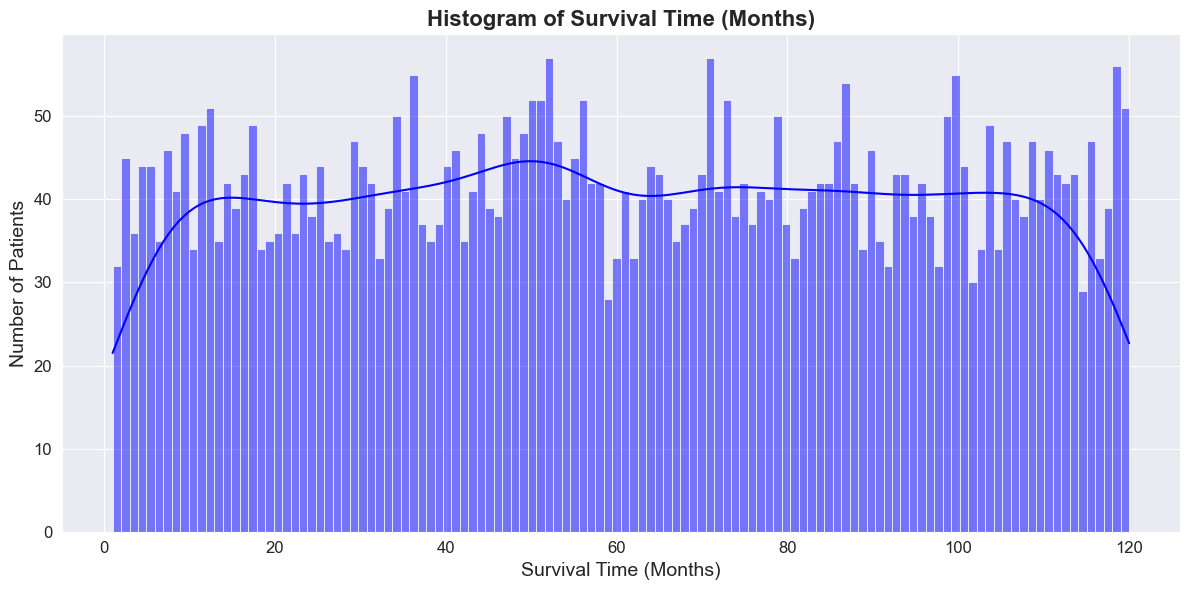

In [92]:
plt.style.use('dark_background')
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=eye_cancer_df,
    x='Survival_Time_Months',
    kde=True,
    bins=120,
    color='blue',
    edgecolor='white'
)
plt.title('Histogram of Survival Time (Months)', fontsize=16, fontweight='bold')
plt.xlabel('Survival Time (Months)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

According to what we can observe from the `Histogram` and the `Kernel Density Estimate`, we can see that the distribution of `Survival_Time_Months` series for all Eye Cancer Types have multiple modes, but what is prominent here is that the probability of observing a survival time close to our `mean` and `median` (~60), which seems to be the highest peak in the `Kernel Density Estimate`.

> Going back to what we stated earlier, the graph also seems to be approximately symmetrical around the `Survival_Time_Months` of `60` which is where our `mean` and `median` are located (approximately speaking).

Let's now explore the `Survival_Time_Months` of each `Cancer_Type` and summarize the data

In [93]:
# Extract each Cancer Types
lymphoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Lymphoma']
melanoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Melanoma']
retinoblastoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Retinoblastoma']

# Get the Survival_Time_Months series for each cancer type
lymphoma_survival_df =  lymphoma_df['Survival_Time_Months']
melanoma_survival_df = melanoma_df['Survival_Time_Months']
retinoblastoma_survival_df = retinoblastoma_df['Survival_Time_Months']


# Summarize the survival time for each cancer type
lymphoma_survival_summary = lymphoma_survival_df.agg(['mean', 'median', 'std'])
lymphoma_survival_summary['mode'] = [int(x) for x in lymphoma_survival_df.mode()]
lymphoma_survival_summary['range'] = lymphoma_survival_df.max() - lymphoma_survival_df.min()
lymphoma_survival_summary['midpoint'] = lymphoma_survival_summary['range'] / 2

melanoma_survival_summary = melanoma_survival_df.agg(['mean', 'median', 'std'])
melanoma_survival_summary['mode'] = [int(x) for x in melanoma_survival_df.mode()]
melanoma_survival_summary['range'] = melanoma_survival_df.max() - melanoma_survival_df.min()
melanoma_survival_summary['midpoint'] = melanoma_survival_summary['range'] / 2

retinoblastoma_survival_summary = retinoblastoma_survival_df.agg(['mean', 'median', 'std'])
retinoblastoma_survival_summary['mode'] = [int(x) for x in retinoblastoma_survival_df.mode()]
retinoblastoma_survival_summary['range'] = retinoblastoma_survival_df.max() - retinoblastoma_survival_df.min()
retinoblastoma_survival_summary['midpoint'] = retinoblastoma_survival_summary['range'] / 2

# Combine the summaries into a single DataFrame
cancer_survival_summary = pd.DataFrame({
    'Lymphoma': lymphoma_survival_summary,
    'Melanoma': melanoma_survival_summary,
    'Retinoblastoma': retinoblastoma_survival_summary
})

cancer_survival_summary

,Lymphoma,Melanoma,Retinoblastoma
mean,60.373855,60.998226,60.76555
median,58.0,61.0,61.0
std,34.457862,34.640188,34.56589
mode,[55],[99],[71]
range,119,119,119
midpoint,59.5,59.5,59.5


As we can see from the table, the `mean` and `median` of each `unique` of `Cancer_Type` varies slightly from one another. Since this is just pure EDA we can save the `ANOVA` for later analysis (phase 2)

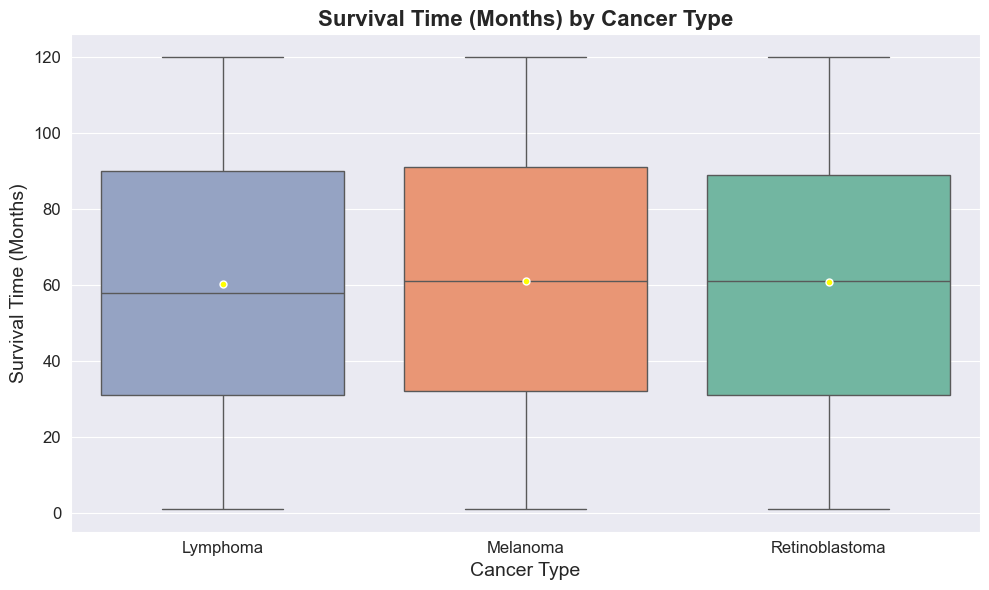

In [94]:
plt.style.use('dark_background')
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=eye_cancer_df,
    x='Cancer_Type',
    y='Survival_Time_Months',
    hue='Cancer_Type',  
    palette='Set2',
    legend=False,       
    showmeans=True,
    meanprops=dict(marker=".", markerfacecolor="yellow", markeredgecolor="white", markersize=10),
    order=sorted(eye_cancer_df['Cancer_Type'].unique())
)
plt.title('Survival Time (Months) by Cancer Type', fontsize=16, fontweight='bold')
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Survival Time (Months)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### **EDA Question 2: How does the stage at diagnosis affect survival time with each cancer type?**
Before we inspect the affect of cancer stage with each cancer type to the survival time<br>
let's visualize the variance of the different stages alone.

C:\Users\alter\AppData\Local\Temp\ipykernel_30132\2420854403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


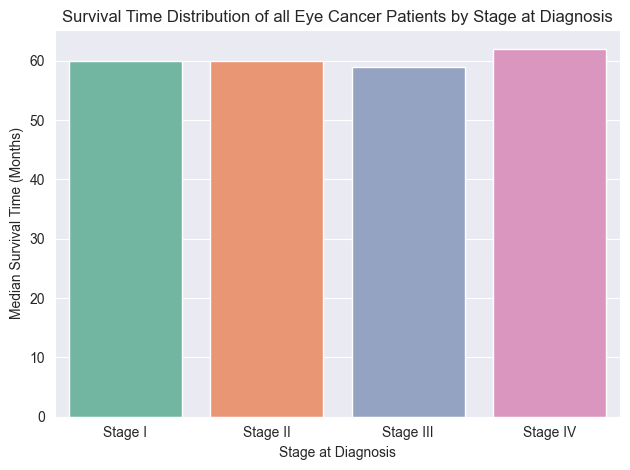

In [95]:
grouped = eye_cancer_df.groupby(['Stage_at_Diagnosis'])['Survival_Time_Months'].median().reset_index()

stage_order = ["Stage I", "Stage II", "Stage III", "Stage IV"]

# Bar plot
sns.barplot(
    data=grouped,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    order=stage_order, palette='Set2'
    )

plt.title("Survival Time Distribution of all Eye Cancer Patients by Stage at Diagnosis")
plt.ylabel("Median Survival Time (Months)")
plt.xlabel("Stage at Diagnosis")
plt.tight_layout()
plt.show()

In [96]:
stage_medians = eye_cancer_df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].median().sort_values()
print("Stage Medians for all eye cancer patients:")
print(stage_medians)

Stage Medians for all eye cancer patients:
Stage_at_Diagnosis
Stage III    59.0
Stage I      60.0
Stage II     60.0
Stage IV     62.0
Name: Survival_Time_Months, dtype: float64


The bar graph and table above visualizes the median Survival Time per Stage at Diagnosis. Similar to the different Cancer Type,<br>
the Survival Time is around **60 months** with little variance between the stages. 

**Now let's include the Cancer Type variable**

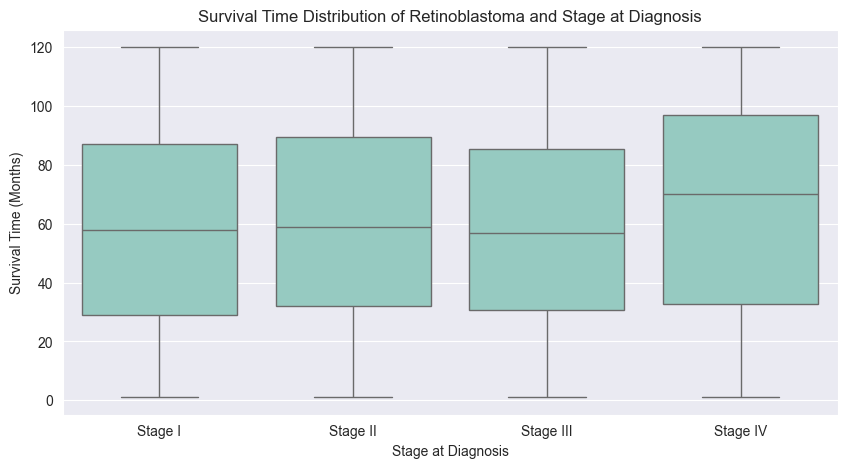

In [97]:
stage_order = ["Stage I", "Stage II", "Stage III", "Stage IV"]
plt.figure(figsize=(10, 5))

retinoblastoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Retinoblastoma']
ax = sns.boxplot(
    data=retinoblastoma_df,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    order=stage_order
    )

plt.title("Survival Time Distribution of Retinoblastoma and Stage at Diagnosis")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Survival Time (Months)")
plt.show()

In [98]:
stage_medians = retinoblastoma_df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].median().sort_values()
print("Stage Medians for Retinoblastoma:")
print(stage_medians)

Stage Medians for Retinoblastoma:
Stage_at_Diagnosis
Stage III    57.0
Stage I      58.0
Stage II     59.0
Stage IV     70.0
Name: Survival_Time_Months, dtype: float64


With **Retinoblastoma**, we can see that Stage 3 has the lowest median of survival time with *57 months*.<br>
Although, Stages 1 and 2 aren't far away at 58 and 59 respectively, which is similar to the medians<br>
from the previous graph. Interstingly, Stage 4 has a median increase of over 10 months at *70 months*. <br>
This is surprising since Stage 4 would signify that the cancer has spread to different areas of the body.<br>

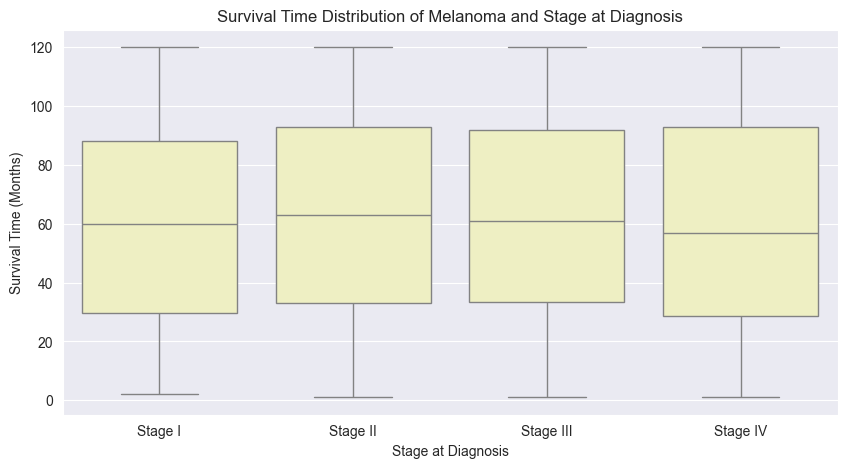

In [99]:
plt.figure(figsize=(10, 5))

melanoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Melanoma']
ax = sns.boxplot(
    data=melanoma_df,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    order=stage_order,
    color='#f5f6bc'
    )

plt.title("Survival Time Distribution of Melanoma and Stage at Diagnosis")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Survival Time (Months)")
plt.show()

In [100]:
stage_medians = melanoma_df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].median().sort_values()
print("Stage Medians for Melanoma:")
print(stage_medians)

Stage Medians for Melanoma:
Stage_at_Diagnosis
Stage IV     57.0
Stage I      60.0
Stage III    61.0
Stage II     63.0
Name: Survival_Time_Months, dtype: float64


For **Melanoma**, we can observe a more stable variance of medians and stages are near the<br>
general median of *60 months*. In comparison to **Retinoblastoma**, Stage 4 now has the lowest <br>
survival time with a median of *57 months*. Additionally, Stages 1 - 3 have increased medians<br>
with all of them being atleast 60.

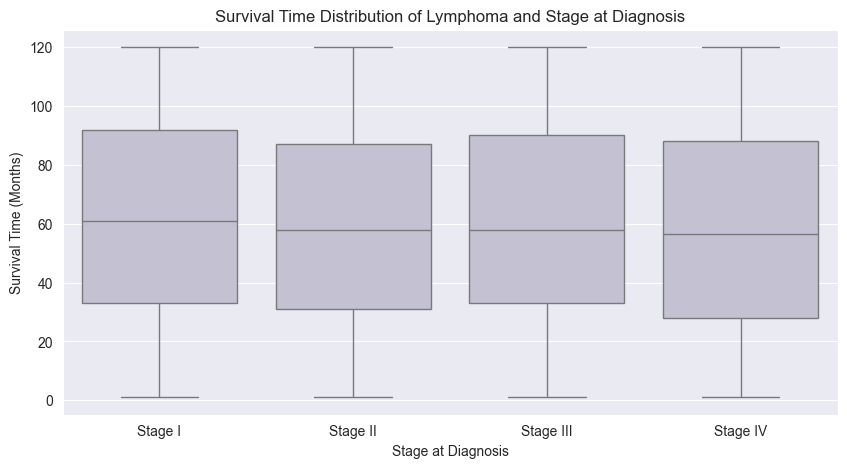

In [101]:
plt.figure(figsize=(10, 5))

lymphoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Lymphoma']
ax = sns.boxplot(
    data=lymphoma_df,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    order=stage_order,
    color='#c2bfd5'
    )

plt.title("Survival Time Distribution of Lymphoma and Stage at Diagnosis")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Survival Time (Months)")
plt.show()

In [102]:
stage_medians = lymphoma_df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].median().sort_values()
print("Stage Medians for Lymphoma:")
print(stage_medians)

Stage Medians for Lymphoma:
Stage_at_Diagnosis
Stage IV     56.5
Stage II     58.0
Stage III    58.0
Stage I      61.0
Name: Survival_Time_Months, dtype: float64


Finally, with **Lymphoma**, we see a similar trend compared to **Melanoma** where stage 4 has the lowest<br>
survival time and the other stages nearing the *60 month* mark. 

**To fully visualize the differences, let's put them all in one box plot and compare the different findings**

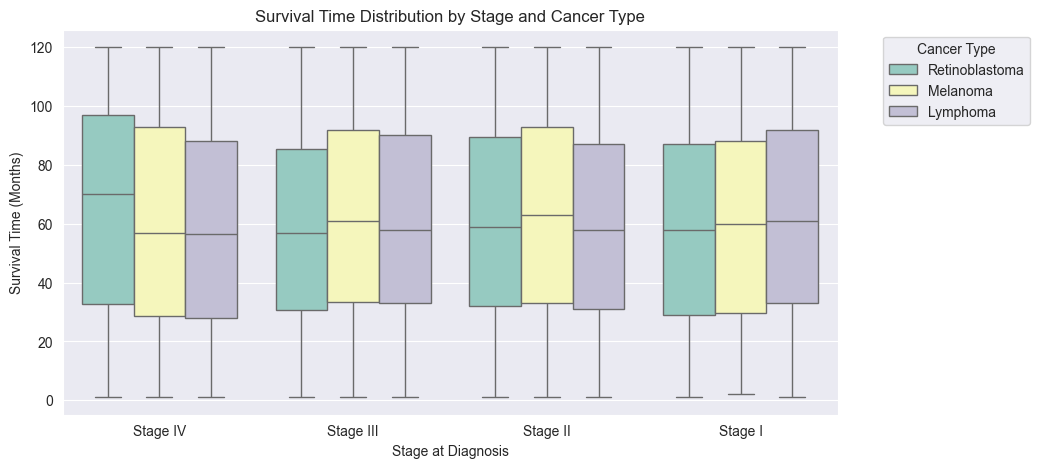

In [103]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=eye_cancer_df,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    hue='Cancer_Type')

plt.title("Survival Time Distribution by Stage and Cancer Type")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Survival Time (Months)")
plt.legend(title='Cancer Type', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [104]:
stage_medians = eye_cancer_df.groupby(['Cancer_Type','Stage_at_Diagnosis'])['Survival_Time_Months'].median().sort_index()
print("Stage Medians for Retinoblastoma:")
print(stage_medians)

Stage Medians for Retinoblastoma:
Cancer_Type     Stage_at_Diagnosis
Lymphoma        Stage I               61.0
                Stage II              58.0
                Stage III             58.0
                Stage IV              56.5
Melanoma        Stage I               60.0
                Stage II              63.0
                Stage III             61.0
                Stage IV              57.0
Retinoblastoma  Stage I               58.0
                Stage II              59.0
                Stage III             57.0
                Stage IV              70.0
Name: Survival_Time_Months, dtype: float64


With everything grouped, we can see that the general trend of survival time of cancer type and<br>
Stage at Siagnosis sits near the 60 month mark which is to be expected since both variables have similar<br>
means at that area. An interesting finding is that Stage 4 **Retinoblastoma** has a greater survival time compared<br>
to any other cancer types or stages. This could explain the larger median of Stage 4 when we compared the stages<br>
and survival time alone.

#### **EDA Question 3: How does age affect survival time with each stage of cancertype?**


First, lets summarize for the mean, median, and standard deviation of `Age` and `Survival Time` for each `Cancer_Type`.

In [105]:
age_survival_summary = eye_cancer_df.groupby('Cancer_Type').agg({
    'Age': ['mean', 'median', 'std'],
    'Survival_Time_Months': ['mean', 'median', 'std']
}).reset_index()

age_survival_summary

Cancer_Type        Age                   Survival_Time_Months         \
                        mean median        std                 mean median   
0        Lymphoma  44.967624   44.0  26.272008            60.373855   58.0   
1        Melanoma  44.890006   44.0  25.889085            60.998226   61.0   
2  Retinoblastoma  45.166866   44.0  25.660753            60.765550   61.0   

              
         std  
0  34.457862  
1  34.640188  
2  34.565890

> This data understands the typical values and the variation for survival time in relation to age with different cancer types. The data shows that among the three **Cancer Types**, they have an aproximate mean ages around 45 and median ages close to 44 years. Similarly, the mean and median of the **Survival Time** are also comparable with cancer types.  

Now, View the survival time distribution over various cancer types, categorized by `Age`. We can use this graph to see the spread, median, and possible outliers of survival time for different `Cancer_Type` based on various age levels.

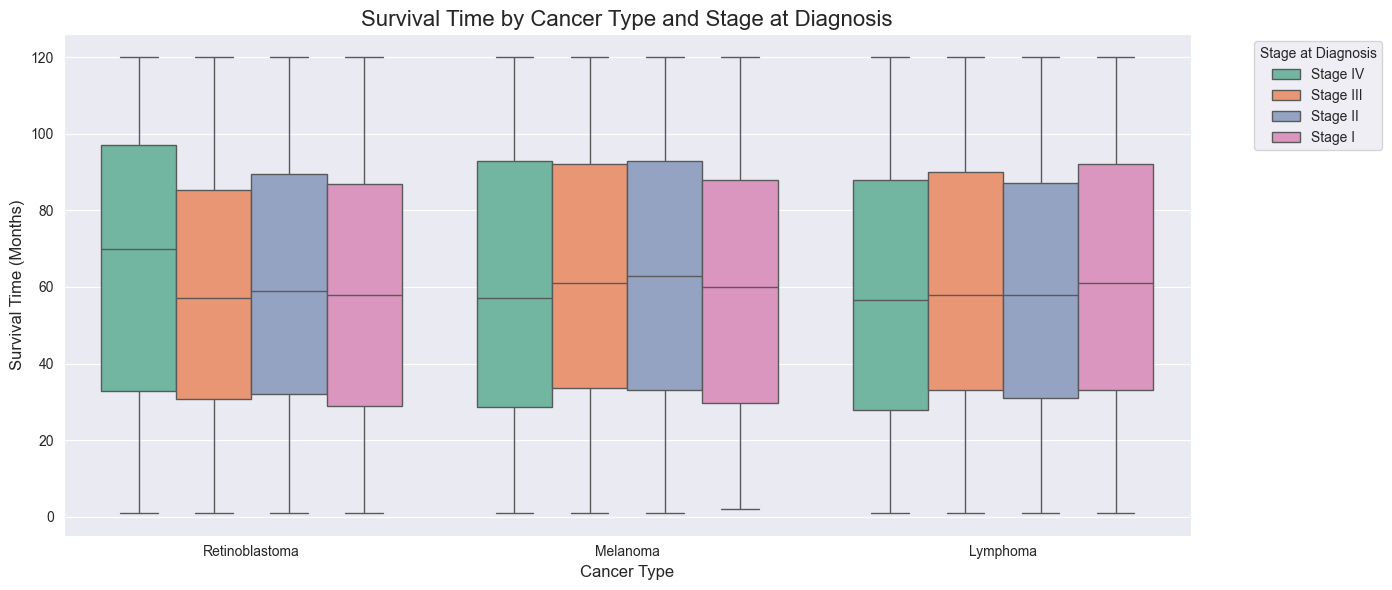

In [106]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=eye_cancer_df, x='Cancer_Type', y='Survival_Time_Months', hue='Stage_at_Diagnosis', palette='Set2')
plt.title('Survival Time by Cancer Type and Stage at Diagnosis', fontsize=16)
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.legend(title='Stage at Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> According to boxplot, it observes stages of cancer influence survival time for each type of cancer.

Since `Age` can have extreme values since it varies different age, it is essential to check for outliers that could contort the analysis. Let's visualize with boxplots for any outliers in `Age` and `Survival Time`.

C:\Users\alter\AppData\Local\Temp\ipykernel_30132\2546270273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eye_cancer_df, x='Age', palette='Set2')


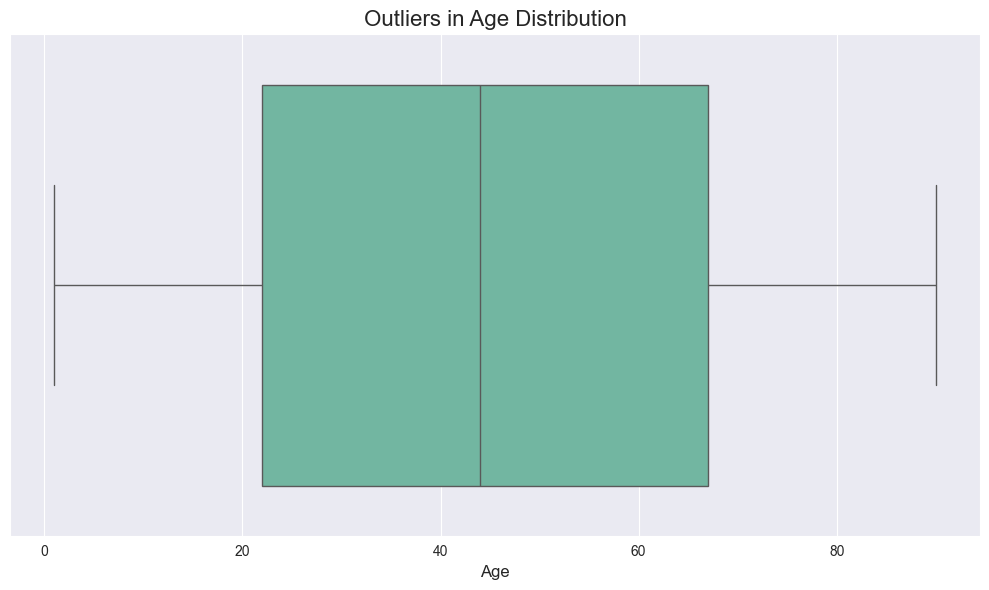

C:\Users\alter\AppData\Local\Temp\ipykernel_30132\2546270273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eye_cancer_df, x='Survival_Time_Months', palette='Set2')


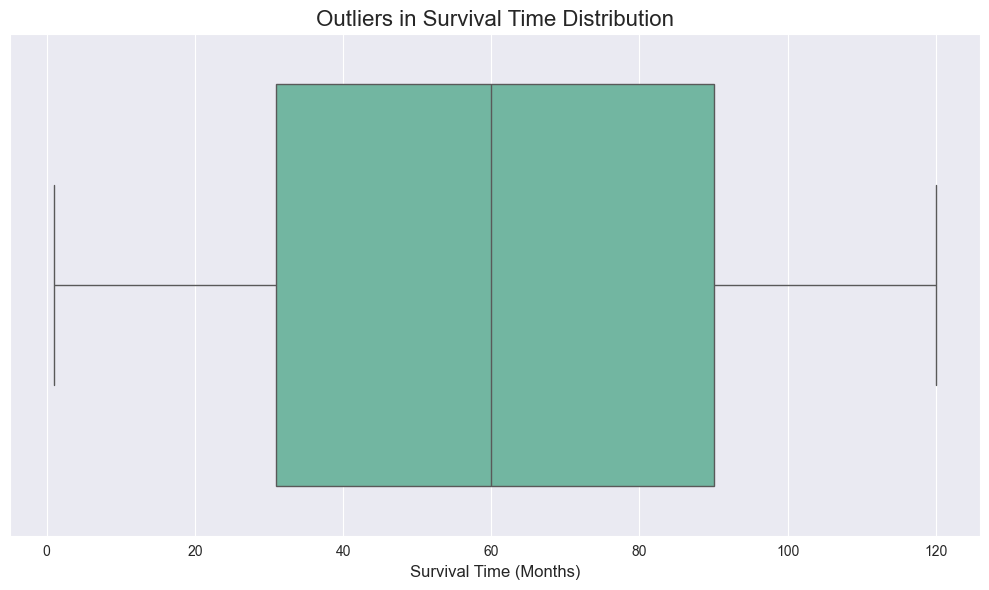

In [107]:
# Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=eye_cancer_df, x='Age', palette='Set2')
plt.title('Outliers in Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

# Survival Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=eye_cancer_df, x='Survival_Time_Months', palette='Set2')
plt.title('Outliers in Survival Time Distribution', fontsize=16)
plt.xlabel('Survival Time (Months)', fontsize=12)
plt.tight_layout()
plt.show()

Then, let's calculate the correlation between age and survival time. This will indicate if there's a linear relationship between these two variables (i.e., whether old or young patients tend to survive longer or shorter).

In [108]:
get_correlation = eye_cancer_df[['Age', 'Survival_Time_Months']].corr()

get_correlation

,Age,Survival_Time_Months
Age,1.000000,0.012547
Survival_Time_Months,0.012547,1.000000


To further investigate how `Age` and `Survival_Time` are distributed, let's visualize the deeper understanding of the patterns in the data. 

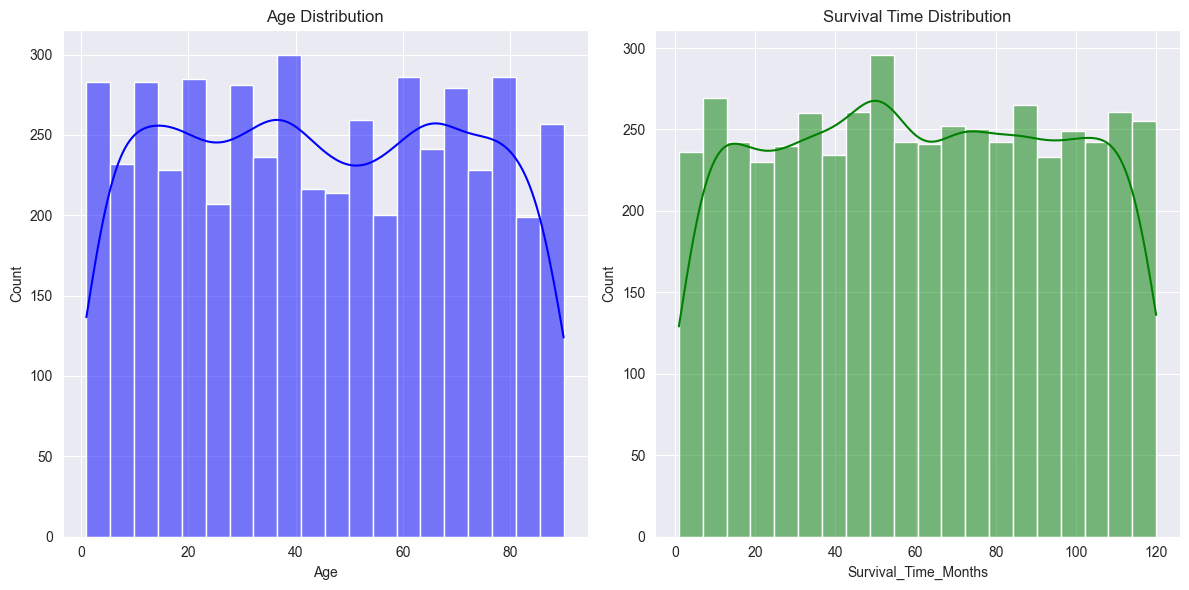

In [109]:
# Plotting histograms for Age and Survival Time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(eye_cancer_df['Age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(eye_cancer_df['Survival_Time_Months'], kde=True, color='green', bins=20)
plt.title('Survival Time Distribution')

plt.tight_layout()
plt.show()

>These distributions are fairly uniform with no such outliers. This can add further analysis on any trends or patterns that are less likely due to age or survival time on the dataset.

For further discovery, we can visualize more along with the `Treatment_Type` to determine if it has an impact on survival time accross differente `Age` groups. 

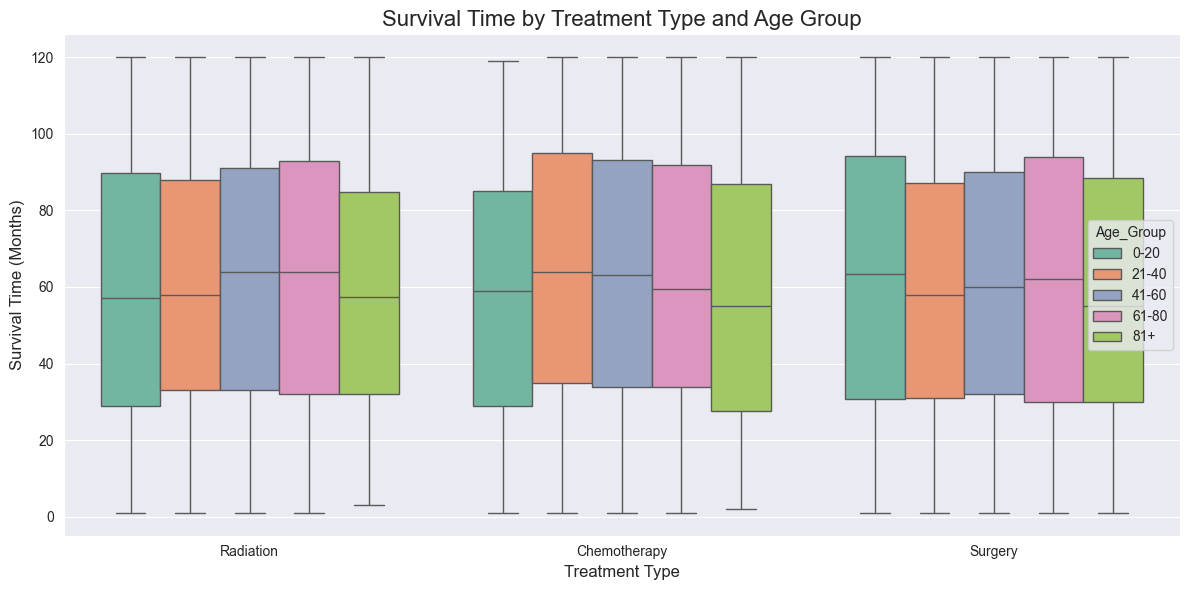

In [110]:
eye_cancer_df['Age_Group'] = pd.cut(eye_cancer_df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=eye_cancer_df, x='Treatment_Type', y='Survival_Time_Months', hue='Age_Group', palette='Set2')
plt.title('Survival Time by Treatment Type and Age Group', fontsize=16)
plt.xlabel('Treatment Type', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.tight_layout()
plt.show()

> **Survival Time** Across all treatment types, the median survival times for each age group are quite similar, generally clustering around the **55–65** month range.

##### **A more thorough Analysis on the Distributions of `Age` and `Survival Time`**

While our mean and median are close (~60 months), let's verify if our data is actually **normally distributed** or just **symmetric**. Mean ≈ median indicates symmetry but doesn't guarantee normality.

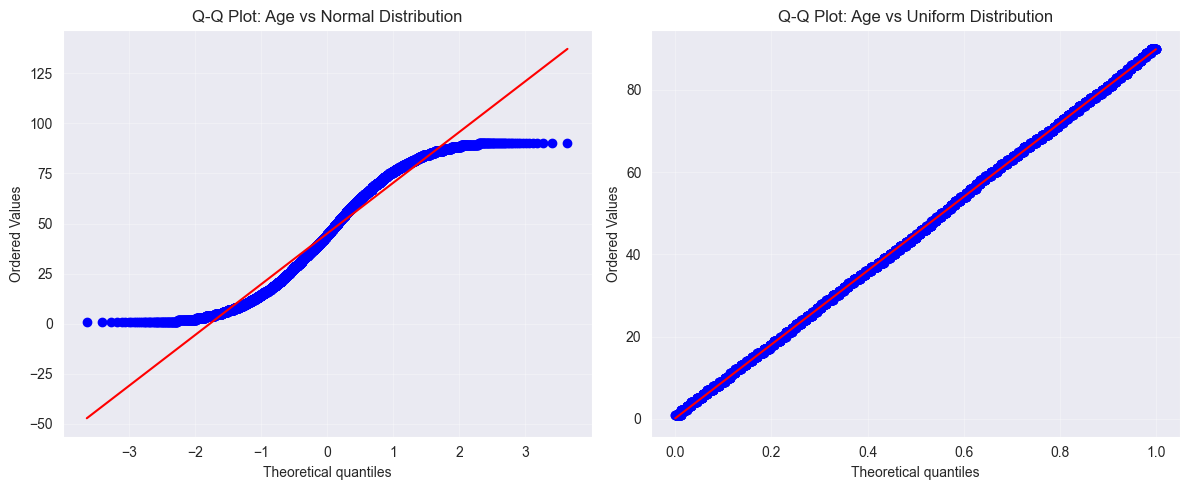

📈 Q-Q PLOT INTERPRETATION FOR AGE:
• If points follow the diagonal line closely → Age matches that distribution
• Deviations from the line indicate departures from the assumed distribution
• Compare both plots to see which distribution Age follows better!


In [112]:
# Visual assessment using Q-Q plot for Age
plt.figure(figsize=(12, 5))

# Q-Q plot for Age vs Normal Distribution
plt.subplot(1, 2, 1)
stats.probplot(age_data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Age vs Normal Distribution')
plt.grid(True, alpha=0.3)

# Q-Q plot for Age vs Uniform Distribution
plt.subplot(1, 2, 2)
stats.probplot(age_data, dist="uniform", plot=plt)
plt.title('Q-Q Plot: Age vs Uniform Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 Q-Q PLOT INTERPRETATION FOR AGE:")
print("• If points follow the diagonal line closely → Age matches that distribution")
print("• Deviations from the line indicate departures from the assumed distribution")
print("• Compare both plots to see which distribution Age follows better!")

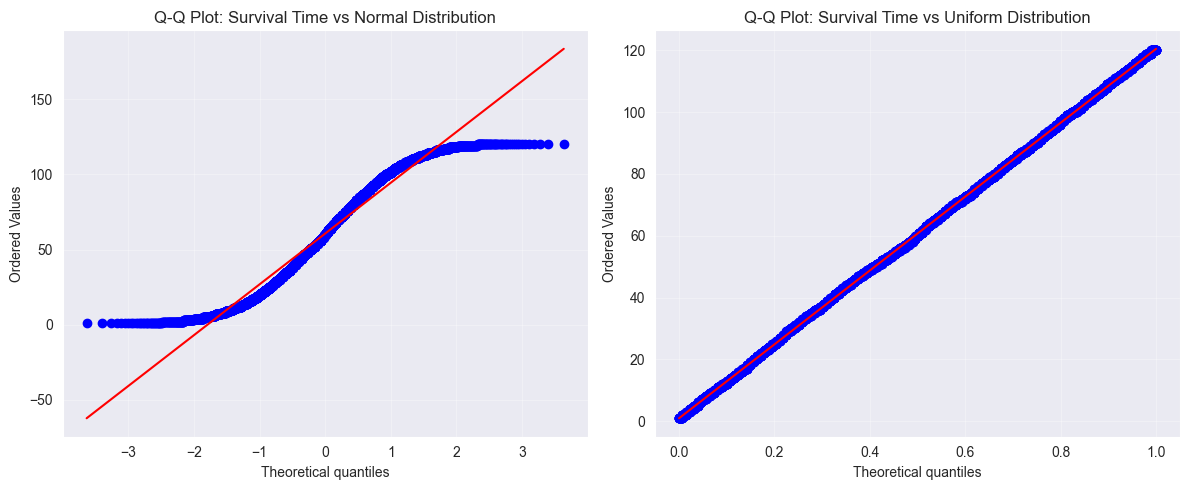

📈 Q-Q PLOT INTERPRETATION:
• If points follow the diagonal line closely → data matches that distribution
• Deviations from the line indicate departures from the assumed distribution
• Compare both plots to see which distribution Survival Time fits better!


In [116]:
# Visual assessment using Q-Q plot
plt.figure(figsize=(12, 5))

# Q-Q plot
plt.subplot(1, 2, 1)
stats.probplot(survival_data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Survival Time vs Normal Distribution')
plt.grid(True, alpha=0.3)

# Compare with uniform distribution Q-Q plot
plt.subplot(1, 2, 2)
# Generate uniform distribution with same range
uniform_data = np.random.uniform(survival_data.min(), survival_data.max(), len(survival_data))
stats.probplot(survival_data, dist="uniform", plot=plt)
plt.title('Q-Q Plot: Survival Time vs Uniform Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 Q-Q PLOT INTERPRETATION:")
print("• If points follow the diagonal line closely → data matches that distribution")
print("• Deviations from the line indicate departures from the assumed distribution")
print("• Compare both plots to see which distribution Survival Time fits better!")

## **What's Next?**

For the next phase of our project, we will use **Pearson’s correlation** and **ANOVA** to analyze potential relationships in our research question.

These techniques are suitable for the following reasons:

- **Pearson’s correlation** measures the strength and direction of **linear relationships** between **two continuous variables**. In our case, this is appropriate for studying the three variables we covered in relation to **survival time**.
  
- **ANOVA (Analysis of Variance)** is used to compare the **means of a continuous variable across multiple categorical groups**. This fits our goal of examining if **survival time** differs significantly across categories like **cancer type** or **diagnosis stage**.

## **Phase 2:**

#### **Statistical Inference 3:** *Inference for Multiple Means of Survival Time by Treatment Type and Age Group using One-Way ANOVA*

From our EDA 3, we found that `Age` and `Survival_Time` doesn't really have any outliers and both variables are fairly uniformly distributed.

Let us recall the boxplot of `SurvivL Time and Stage at Diagnosis`



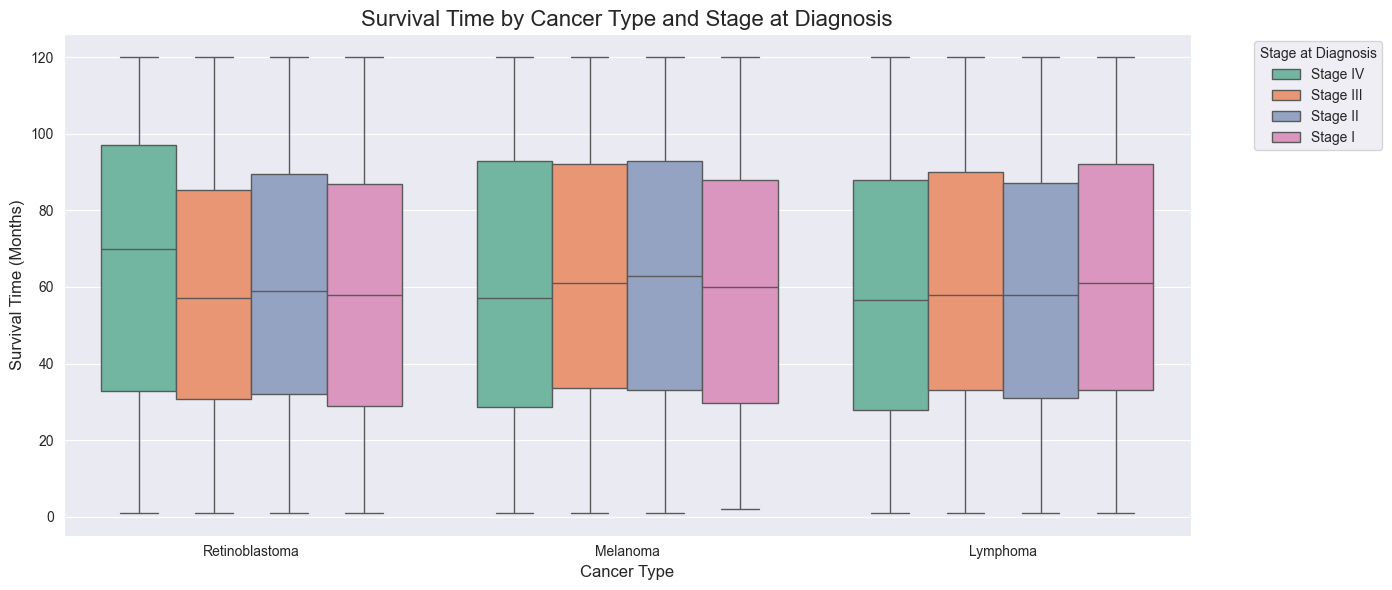

In [114]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=eye_cancer_df, x='Cancer_Type', y='Survival_Time_Months', hue='Stage_at_Diagnosis', palette='Set2')
plt.title('Survival Time by Cancer Type and Stage at Diagnosis', fontsize=16)
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.legend(title='Stage at Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> We can see from the graph that the median `Survival Time (Months)` for each `Stage` of each `Cancer Type` clusters around 60 months (5 years). Which also seems to prove the premise earlier about distribution of `Survival_Time`

What may be more interesting to study is the boxplot of the `Survival Time by Treatment type and Age Group`.

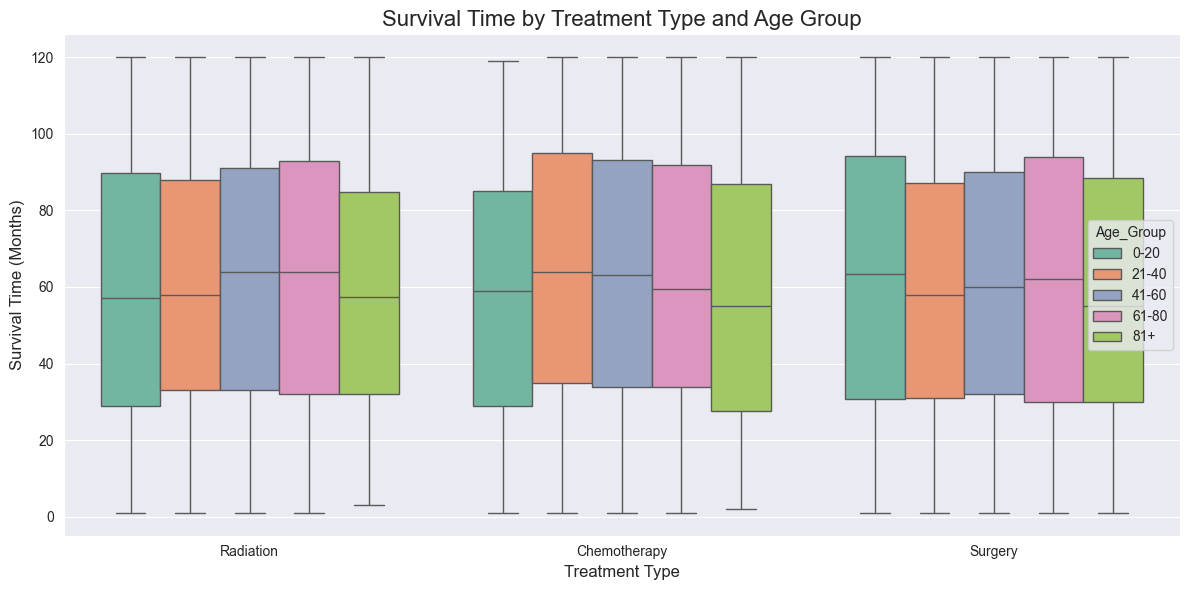

In [115]:
eye_cancer_df['Age_Group'] = pd.cut(eye_cancer_df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=eye_cancer_df, x='Treatment_Type', y='Survival_Time_Months', hue='Age_Group', palette='Set2')
plt.title('Survival Time by Treatment Type and Age Group', fontsize=16)
plt.xlabel('Treatment Type', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.tight_layout()
plt.show()

Taking into mind that different configurations of the binning of `Age` into `Age_Group` may/may not significantly affect the median and mean of `Survival Time`. We will stick into the binning used by the EDA 3 `Age_Groups` which splits the `Age` into 5 bins.

Taking into account that since our median and mean are fairly close, we may perform a test for multiple means using **One-Way ANOVA (Analysis Of Variance)**.
This is due to **ANOVA** being fairly robust to deviations from normality and given that we have a large enough sample size, this method of statistical inference is justifiable.

From here, we will set a general expectation that the older you are into the `Age_Group` when you get a treatment, the `Survival Time (Months)` mean falls. In other words, our `Alternative Hypothesis` is at least one of the means of the `Age_Group` has a statistically significant variance against the other means of the same variable.

#### **One-Way ANOVA: Age Groups within Radiation Treatment Type**

Let's perform a one-way ANOVA to test if there are significant differences in survival time across different age groups for patients who received **Radiation** treatment specifically.

**Hypothesis:**
- **H₀ (Null):** There is no significant difference in mean survival time across age groups for radiation treatment patients
- **H₁ (Alternative):** At least one age group has a significantly different mean survival time for radiation treatment patients

In [117]:
# Filter data for Radiation treatment only
radiation_patients = eye_cancer_df[eye_cancer_df['Treatment_Type'] == 'Radiation'].copy()

# Ensure Age_Group column exists
if 'Age_Group' not in radiation_patients.columns:
    radiation_patients['Age_Group'] = pd.cut(radiation_patients['Age'], 
                                           bins=[0, 20, 40, 60, 80, 100], 
                                           labels=['0-20', '21-40', '41-60', '61-80', '81+'])

print("ONE-WAY ANOVA: Survival Time by Age Groups (Radiation Treatment Only)")
print("="*70)
print(f"Total radiation patients: {len(radiation_patients)}")
print()

# Check sample sizes for each age group
age_group_counts = radiation_patients['Age_Group'].value_counts().sort_index()
print("Sample sizes by Age Group:")
for age_group, count in age_group_counts.items():
    print(f"  {age_group}: {count} patients")
print()

# Separate survival times by age group for radiation patients
age_groups_radiation = []
age_group_names = []
age_group_stats = []

for age_group in radiation_patients['Age_Group'].cat.categories:
    if age_group in radiation_patients['Age_Group'].values:  # Check if age group exists
        survival_data = radiation_patients[radiation_patients['Age_Group'] == age_group]['Survival_Time_Months']
        if len(survival_data) > 0:  # Only include non-empty groups
            age_groups_radiation.append(survival_data)
            age_group_names.append(age_group)
            
            # Calculate descriptive statistics
            mean_survival = survival_data.mean()
            median_survival = survival_data.median()
            std_survival = survival_data.std()
            age_group_stats.append({
                'Age_Group': age_group,
                'Count': len(survival_data),
                'Mean': mean_survival,
                'Median': median_survival,
                'Std': std_survival
            })
            
            print(f"{age_group}: n={len(survival_data)}, mean={mean_survival:.2f}, median={median_survival:.2f}, std={std_survival:.2f}")

print("\n" + "="*50)
print("ANOVA RESULTS")
print("="*50)

# Perform one-way ANOVA (only if we have at least 2 groups)
if len(age_groups_radiation) >= 2:
    f_statistic, p_value = stats.f_oneway(*age_groups_radiation)
    
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Alpha level: 0.05")
    print(f"Degrees of freedom between groups: {len(age_groups_radiation) - 1}")
    print(f"Degrees of freedom within groups: {sum(len(group) for group in age_groups_radiation) - len(age_groups_radiation)}")
    
    # Interpret results
    print("\n" + "="*30)
    print("INTERPRETATION:")
    print("="*30)
    if p_value < 0.05:
        print("✅ RESULT: Reject null hypothesis (p < 0.05)")
        print("🔍 CONCLUSION: There IS a statistically significant difference")
        print("   in mean survival time across age groups for radiation treatment patients")
        print("\n💡 IMPLICATION: Age significantly affects survival outcomes")
        print("   for patients receiving radiation treatment")
    else:
        print("❌ RESULT: Fail to reject null hypothesis (p ≥ 0.05)")
        print("🔍 CONCLUSION: There is NO statistically significant difference")
        print("   in mean survival time across age groups for radiation treatment patients")
        print("\n💡 IMPLICATION: Age does not significantly affect survival outcomes")
        print("   for patients receiving radiation treatment")
        
    # Effect size (eta-squared)
    ss_between = f_statistic * (len(age_groups_radiation) - 1)
    ss_total = ss_between + (sum(len(group) for group in age_groups_radiation) - len(age_groups_radiation))
    eta_squared = ss_between / (ss_between + (sum(len(group) for group in age_groups_radiation) - len(age_groups_radiation)))
    
    print(f"\n📊 Effect Size (η²): {eta_squared:.4f}")
    if eta_squared < 0.01:
        effect_size = "Small"
    elif eta_squared < 0.06:
        effect_size = "Medium" 
    else:
        effect_size = "Large"
    print(f"   Effect size interpretation: {effect_size}")
        
else:
    print("⚠️ WARNING: Insufficient groups for ANOVA analysis")
    print(f"   Found only {len(age_groups_radiation)} age groups with data")
    print("   ANOVA requires at least 2 groups")

ONE-WAY ANOVA: Survival Time by Age Groups (Radiation Treatment Only)
Total radiation patients: 1656

Sample sizes by Age Group:
  0-20: 370 patients
  21-40: 384 patients
  41-60: 351 patients
  61-80: 369 patients
  81+: 182 patients

0-20: n=370, mean=58.88, median=57.00, std=35.30
21-40: n=384, mean=59.77, median=58.00, std=33.58
41-60: n=351, mean=62.17, median=64.00, std=34.38
61-80: n=369, mean=62.49, median=64.00, std=35.30
81+: n=182, mean=58.58, median=57.50, std=32.42

ANOVA RESULTS
F-statistic: 0.9013
p-value: 0.4623
Alpha level: 0.05
Degrees of freedom between groups: 4
Degrees of freedom within groups: 1651

INTERPRETATION:
❌ RESULT: Fail to reject null hypothesis (p ≥ 0.05)
🔍 CONCLUSION: There is NO statistically significant difference
   in mean survival time across age groups for radiation treatment patients

💡 IMPLICATION: Age does not significantly affect survival outcomes
   for patients receiving radiation treatment

📊 Effect Size (η²): 0.0022
   Effect size interp

C:\Users\alter\AppData\Local\Temp\ipykernel_30132\1547804562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=radiation_patients,


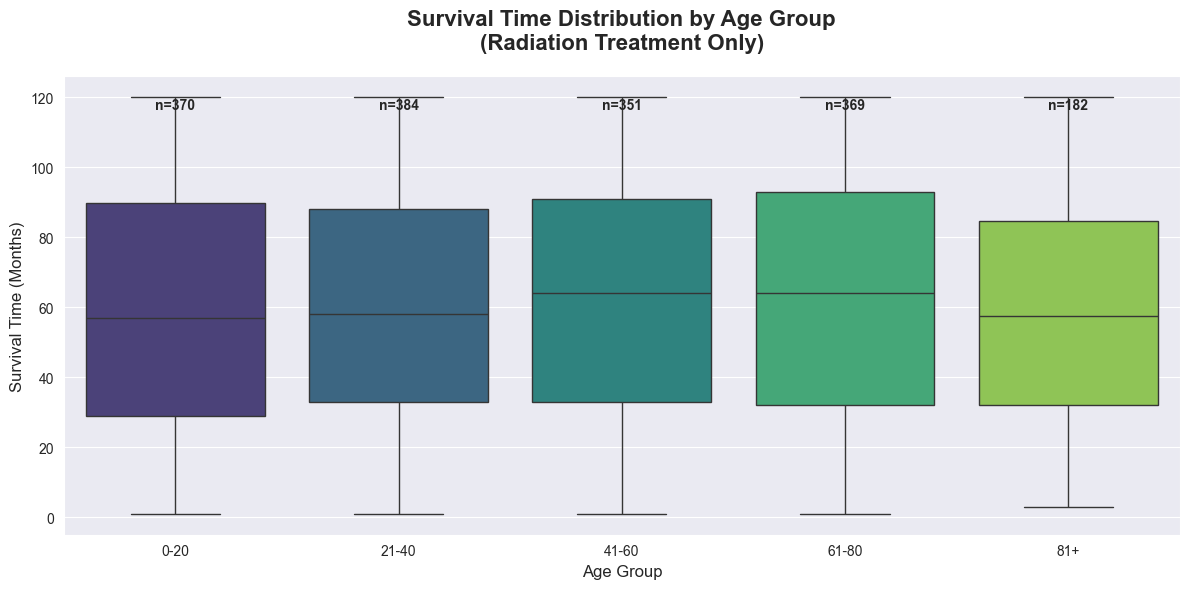

📊 BOXPLOT INTERPRETATION:
• Compare the median lines (center lines in boxes) across age groups
• Look for overlapping vs. non-overlapping interquartile ranges (boxes)
• Greater separation suggests larger differences between groups
• The ANOVA test confirms if observed differences are statistically significant


In [ ]:
# Visualize the data with box plot for Radiation Treatment Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=radiation_patients, 
           x='Age_Group', 
           y='Survival_Time_Months',
           hue='Age_Group',
           palette='viridis',
           legend=False)

plt.title('Survival Time Distribution by Age Group\n(Radiation Treatment Only)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.xticks(rotation=0)

# Add sample sizes as text on the plot
for i, age_group in enumerate(radiation_patients['Age_Group'].cat.categories):
    if age_group in radiation_patients['Age_Group'].values:
        count = len(radiation_patients[radiation_patients['Age_Group'] == age_group])
        if count > 0:
            plt.text(i, plt.ylim()[1]*0.95, f'n={count}', 
                    ha='center', va='top', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 BOXPLOT INTERPRETATION:")
print("• Compare the median lines (center lines in boxes) across age groups")
print("• Look for overlapping vs. non-overlapping interquartile ranges (boxes)")  
print("• Greater separation suggests larger differences between groups")
print("• The ANOVA test confirms if observed differences are statistically significant")

#### **One-Way ANOVA: Age Groups within Chemotherapy Treatment Type**

Now let's perform the same analysis for patients who received **Chemotherapy** treatment to see if age affects survival outcomes differently compared to radiation treatment.

**Hypothesis:**
- **H₀ (Null):** There is no significant difference in mean survival time across age groups for chemotherapy treatment patients
- **H₁ (Alternative):** At least one age group has a significantly different mean survival time for chemotherapy treatment patients

In [121]:
# Filter data for Chemotherapy treatment only
chemo_patients = eye_cancer_df[eye_cancer_df['Treatment_Type'] == 'Chemotherapy'].copy()

# Ensure Age_Group column exists
if 'Age_Group' not in chemo_patients.columns:
    chemo_patients['Age_Group'] = pd.cut(chemo_patients['Age'], 
                                        bins=[0, 20, 40, 60, 80, 100], 
                                        labels=['0-20', '21-40', '41-60', '61-80', '81+'])

print("ONE-WAY ANOVA: Survival Time by Age Groups (Chemotherapy Treatment Only)")
print("="*75)
print(f"Total chemotherapy patients: {len(chemo_patients)}")
print()

# Check sample sizes for each age group
age_group_counts_chemo = chemo_patients['Age_Group'].value_counts().sort_index()
print("Sample sizes by Age Group:")
for age_group, count in age_group_counts_chemo.items():
    print(f"  {age_group}: {count} patients")
print()

# Separate survival times by age group for chemotherapy patients
age_groups_chemo = []
age_group_names_chemo = []
age_group_stats_chemo = []

for age_group in chemo_patients['Age_Group'].cat.categories:
    if age_group in chemo_patients['Age_Group'].values:  # Check if age group exists
        survival_data = chemo_patients[chemo_patients['Age_Group'] == age_group]['Survival_Time_Months']
        if len(survival_data) > 0:  # Only include non-empty groups
            age_groups_chemo.append(survival_data)
            age_group_names_chemo.append(age_group)
            
            # Calculate descriptive statistics
            mean_survival = survival_data.mean()
            median_survival = survival_data.median()
            std_survival = survival_data.std()
            age_group_stats_chemo.append({
                'Age_Group': age_group,
                'Count': len(survival_data),
                'Mean': mean_survival,
                'Median': median_survival,
                'Std': std_survival
            })
            
            print(f"{age_group}: n={len(survival_data)}, mean={mean_survival:.2f}, median={median_survival:.2f}, std={std_survival:.2f}")

print("\n" + "="*50)
print("ANOVA RESULTS")
print("="*50)

# Perform one-way ANOVA (only if we have at least 2 groups)
if len(age_groups_chemo) >= 2:
    f_statistic_chemo, p_value_chemo = stats.f_oneway(*age_groups_chemo)
    
    print(f"F-statistic: {f_statistic_chemo:.4f}")
    print(f"p-value: {p_value_chemo:.4f}")
    print(f"Alpha level: 0.05")
    print(f"Degrees of freedom between groups: {len(age_groups_chemo) - 1}")
    print(f"Degrees of freedom within groups: {sum(len(group) for group in age_groups_chemo) - len(age_groups_chemo)}")
    
    # Interpret results
    print("\n" + "="*30)
    print("INTERPRETATION:")
    print("="*30)
    if p_value_chemo < 0.05:
        print("✅ RESULT: Reject null hypothesis (p < 0.05)")
        print("🔍 CONCLUSION: There IS a statistically significant difference")
        print("   in mean survival time across age groups for chemotherapy treatment patients")
        print("\n💡 IMPLICATION: Age significantly affects survival outcomes")
        print("   for patients receiving chemotherapy treatment")
    else:
        print("❌ RESULT: Fail to reject null hypothesis (p ≥ 0.05)")
        print("🔍 CONCLUSION: There is NO statistically significant difference")
        print("   in mean survival time across age groups for chemotherapy treatment patients")
        print("\n💡 IMPLICATION: Age does not significantly affect survival outcomes")
        print("   for patients receiving chemotherapy treatment")
        
    # Effect size (eta-squared)
    ss_between_chemo = f_statistic_chemo * (len(age_groups_chemo) - 1)
    ss_total_chemo = ss_between_chemo + (sum(len(group) for group in age_groups_chemo) - len(age_groups_chemo))
    eta_squared_chemo = ss_between_chemo / (ss_between_chemo + (sum(len(group) for group in age_groups_chemo) - len(age_groups_chemo)))
    
    print(f"\n📊 Effect Size (η²): {eta_squared_chemo:.4f}")
    if eta_squared_chemo < 0.01:
        effect_size_chemo = "Small"
    elif eta_squared_chemo < 0.06:
        effect_size_chemo = "Medium" 
    else:
        effect_size_chemo = "Large"
    print(f"   Effect size interpretation: {effect_size_chemo}")
        
else:
    print("⚠️ WARNING: Insufficient groups for ANOVA analysis")
    print(f"   Found only {len(age_groups_chemo)} age groups with data")
    print("   ANOVA requires at least 2 groups")

ONE-WAY ANOVA: Survival Time by Age Groups (Chemotherapy Treatment Only)
Total chemotherapy patients: 1665

Sample sizes by Age Group:
  0-20: 395 patients
  21-40: 361 patients
  41-60: 364 patients
  61-80: 378 patients
  81+: 167 patients

0-20: n=395, mean=58.15, median=59.00, std=32.99
21-40: n=361, mean=63.22, median=64.00, std=33.61
41-60: n=364, mean=62.65, median=63.00, std=34.73
61-80: n=378, mean=61.43, median=59.50, std=34.37
81+: n=167, mean=58.54, median=55.00, std=34.96

ANOVA RESULTS
F-statistic: 1.5243
p-value: 0.1926
Alpha level: 0.05
Degrees of freedom between groups: 4
Degrees of freedom within groups: 1660

INTERPRETATION:
❌ RESULT: Fail to reject null hypothesis (p ≥ 0.05)
🔍 CONCLUSION: There is NO statistically significant difference
   in mean survival time across age groups for chemotherapy treatment patients

💡 IMPLICATION: Age does not significantly affect survival outcomes
   for patients receiving chemotherapy treatment

📊 Effect Size (η²): 0.0037
   Effect

C:\Users\alter\AppData\Local\Temp\ipykernel_30132\841230344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=chemo_patients,


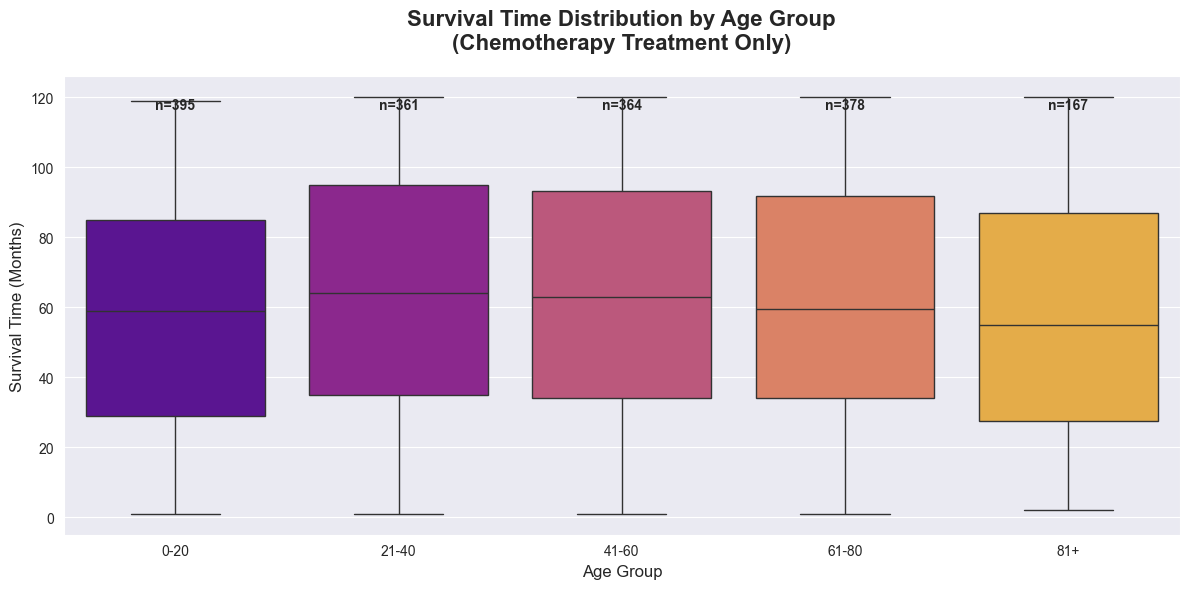

📊 BOXPLOT INTERPRETATION (Chemotherapy):
• Compare the median lines across age groups for chemotherapy patients
• Look for patterns different from radiation treatment results
• The ANOVA test confirms if observed differences are statistically significant


In [ ]:
# Visualize the data with box plot for Chemotherapy Treatment Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=chemo_patients, 
           x='Age_Group', 
           y='Survival_Time_Months',
           hue='Age_Group',
           palette='plasma',
           legend=False)

plt.title('Survival Time Distribution by Age Group\n(Chemotherapy Treatment Only)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.xticks(rotation=0)

# Add sample sizes as text on the plot
for i, age_group in enumerate(chemo_patients['Age_Group'].cat.categories):
    if age_group in chemo_patients['Age_Group'].values:
        count = len(chemo_patients[chemo_patients['Age_Group'] == age_group])
        if count > 0:
            plt.text(i, plt.ylim()[1]*0.95, f'n={count}', 
                    ha='center', va='top', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 BOXPLOT INTERPRETATION:")
print("• Compare the median lines (center lines in boxes) across age groups")
print("• Look for overlapping vs. non-overlapping interquartile ranges (boxes)")  
print("• Greater separation suggests larger differences between groups")
print("• The ANOVA test confirms if observed differences are statistically significant")

#### **One-Way ANOVA: Age Groups within Surgery Treatment Type**

Finally, let's complete our analysis by examining patients who received **Surgery** treatment to see if age affects survival outcomes across all three treatment modalities.

**Hypothesis:**
- **H₀ (Null):** There is no significant difference in mean survival time across age groups for surgery treatment patients
- **H₁ (Alternative):** At least one age group has a significantly different mean survival time for surgery treatment patients

In [124]:
# Filter data for Surgery treatment only
surgery_patients = eye_cancer_df[eye_cancer_df['Treatment_Type'] == 'Surgery'].copy()

# Ensure Age_Group column exists
if 'Age_Group' not in surgery_patients.columns:
    surgery_patients['Age_Group'] = pd.cut(surgery_patients['Age'], 
                                          bins=[0, 20, 40, 60, 80, 100], 
                                          labels=['0-20', '21-40', '41-60', '61-80', '81+'])

print("ONE-WAY ANOVA: Survival Time by Age Groups (Surgery Treatment Only)")
print("="*70)
print(f"Total surgery patients: {len(surgery_patients)}")
print()

# Check sample sizes for each age group
age_group_counts_surgery = surgery_patients['Age_Group'].value_counts().sort_index()
print("Sample sizes by Age Group:")
for age_group, count in age_group_counts_surgery.items():
    print(f"  {age_group}: {count} patients")
print()

# Separate survival times by age group for surgery patients
age_groups_surgery = []
age_group_names_surgery = []
age_group_stats_surgery = []

for age_group in surgery_patients['Age_Group'].cat.categories:
    if age_group in surgery_patients['Age_Group'].values:  # Check if age group exists
        survival_data = surgery_patients[surgery_patients['Age_Group'] == age_group]['Survival_Time_Months']
        if len(survival_data) > 0:  # Only include non-empty groups
            age_groups_surgery.append(survival_data)
            age_group_names_surgery.append(age_group)
            
            # Calculate descriptive statistics
            mean_survival = survival_data.mean()
            median_survival = survival_data.median()
            std_survival = survival_data.std()
            age_group_stats_surgery.append({
                'Age_Group': age_group,
                'Count': len(survival_data),
                'Mean': mean_survival,
                'Median': median_survival,
                'Std': std_survival
            })
            
            print(f"{age_group}: n={len(survival_data)}, mean={mean_survival:.2f}, median={median_survival:.2f}, std={std_survival:.2f}")

print("\n" + "="*50)
print("ANOVA RESULTS")
print("="*50)

# Perform one-way ANOVA (only if we have at least 2 groups)
if len(age_groups_surgery) >= 2:
    f_statistic_surgery, p_value_surgery = stats.f_oneway(*age_groups_surgery)
    
    print(f"F-statistic: {f_statistic_surgery:.4f}")
    print(f"p-value: {p_value_surgery:.4f}")
    print(f"Alpha level: 0.05")
    print(f"Degrees of freedom between groups: {len(age_groups_surgery) - 1}")
    print(f"Degrees of freedom within groups: {sum(len(group) for group in age_groups_surgery) - len(age_groups_surgery)}")
    
    # Interpret results
    print("\n" + "="*30)
    print("INTERPRETATION:")
    print("="*30)
    if p_value_surgery < 0.05:
        print("✅ RESULT: Reject null hypothesis (p < 0.05)")
        print("🔍 CONCLUSION: There IS a statistically significant difference")
        print("   in mean survival time across age groups for surgery treatment patients")
        print("\n💡 IMPLICATION: Age significantly affects survival outcomes")
        print("   for patients receiving surgery treatment")
    else:
        print("❌ RESULT: Fail to reject null hypothesis (p ≥ 0.05)")
        print("🔍 CONCLUSION: There is NO statistically significant difference")
        print("   in mean survival time across age groups for surgery treatment patients")
        print("\n💡 IMPLICATION: Age does not significantly affect survival outcomes")
        print("   for patients receiving surgery treatment")
        
    # Effect size (eta-squared)
    ss_between_surgery = f_statistic_surgery * (len(age_groups_surgery) - 1)
    ss_total_surgery = ss_between_surgery + (sum(len(group) for group in age_groups_surgery) - len(age_groups_surgery))
    eta_squared_surgery = ss_between_surgery / (ss_between_surgery + (sum(len(group) for group in age_groups_surgery) - len(age_groups_surgery)))
    
    print(f"\n📊 Effect Size (η²): {eta_squared_surgery:.4f}")
    if eta_squared_surgery < 0.01:
        effect_size_surgery = "Small"
    elif eta_squared_surgery < 0.06:
        effect_size_surgery = "Medium" 
    else:
        effect_size_surgery = "Large"
    print(f"   Effect size interpretation: {effect_size_surgery}")
        
else:
    print("⚠️ WARNING: Insufficient groups for ANOVA analysis")
    print(f"   Found only {len(age_groups_surgery)} age groups with data")
    print("   ANOVA requires at least 2 groups")

ONE-WAY ANOVA: Survival Time by Age Groups (Surgery Treatment Only)
Total surgery patients: 1679

Sample sizes by Age Group:
  0-20: 384 patients
  21-40: 392 patients
  41-60: 345 patients
  61-80: 395 patients
  81+: 163 patients

0-20: n=384, mean=62.12, median=63.50, std=36.17
21-40: n=392, mean=58.58, median=58.00, std=34.52
41-60: n=345, mean=60.68, median=60.00, std=34.84
61-80: n=395, mean=61.55, median=62.00, std=35.45
81+: n=163, mean=59.18, median=55.00, std=34.87

ANOVA RESULTS
F-statistic: 0.6409
p-value: 0.6334
Alpha level: 0.05
Degrees of freedom between groups: 4
Degrees of freedom within groups: 1674

INTERPRETATION:
❌ RESULT: Fail to reject null hypothesis (p ≥ 0.05)
🔍 CONCLUSION: There is NO statistically significant difference
   in mean survival time across age groups for surgery treatment patients

💡 IMPLICATION: Age does not significantly affect survival outcomes
   for patients receiving surgery treatment

📊 Effect Size (η²): 0.0015
   Effect size interpretation

C:\Users\alter\AppData\Local\Temp\ipykernel_30132\3128068727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=surgery_patients,


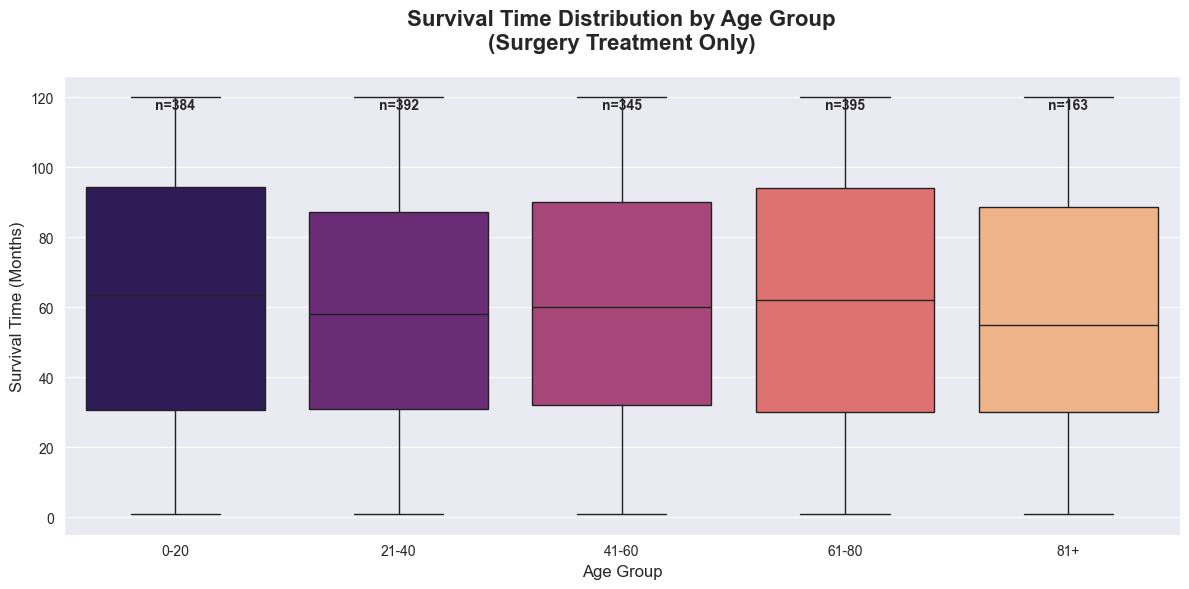

📊 BOXPLOT INTERPRETATION (Surgery):
• Compare the median lines across age groups for surgery patients
• Look for patterns different from radiation and chemotherapy results
• The ANOVA test confirms if observed differences are statistically significant


In [ ]:
# Visualize the data with box plot for Surgery Treatment Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=surgery_patients, 
           x='Age_Group', 
           y='Survival_Time_Months',
           hue='Age_Group',
           palette='magma',
           legend=False)

plt.title('Survival Time Distribution by Age Group\n(Surgery Treatment Only)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.xticks(rotation=0)

# Add sample sizes as text on the plot
for i, age_group in enumerate(surgery_patients['Age_Group'].cat.categories):
    if age_group in surgery_patients['Age_Group'].values:
        count = len(surgery_patients[surgery_patients['Age_Group'] == age_group])
        if count > 0:
            plt.text(i, plt.ylim()[1]*0.95, f'n={count}', 
                    ha='center', va='top', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 BOXPLOT INTERPRETATION:")
print("• Compare the median lines (center lines in boxes) across age groups")
print("• Look for overlapping vs. non-overlapping interquartile ranges (boxes)")  
print("• Greater separation suggests larger differences between groups")
print("• The ANOVA test confirms if observed differences are statistically significant")

#### **Comparative Summary: Age Effects Across All Treatment Types**

Now that we've completed one-way ANOVA analyses for all three treatment types (Radiation, Chemotherapy, and Surgery), let's create a comprehensive comparison to understand how age affects survival outcomes differently across treatment modalities.

This comparative analysis will help us determine:
- Which treatment types show significant age-related survival differences
- Whether the patterns of age effects are consistent across treatments  
- The clinical implications for treatment selection based on patient age

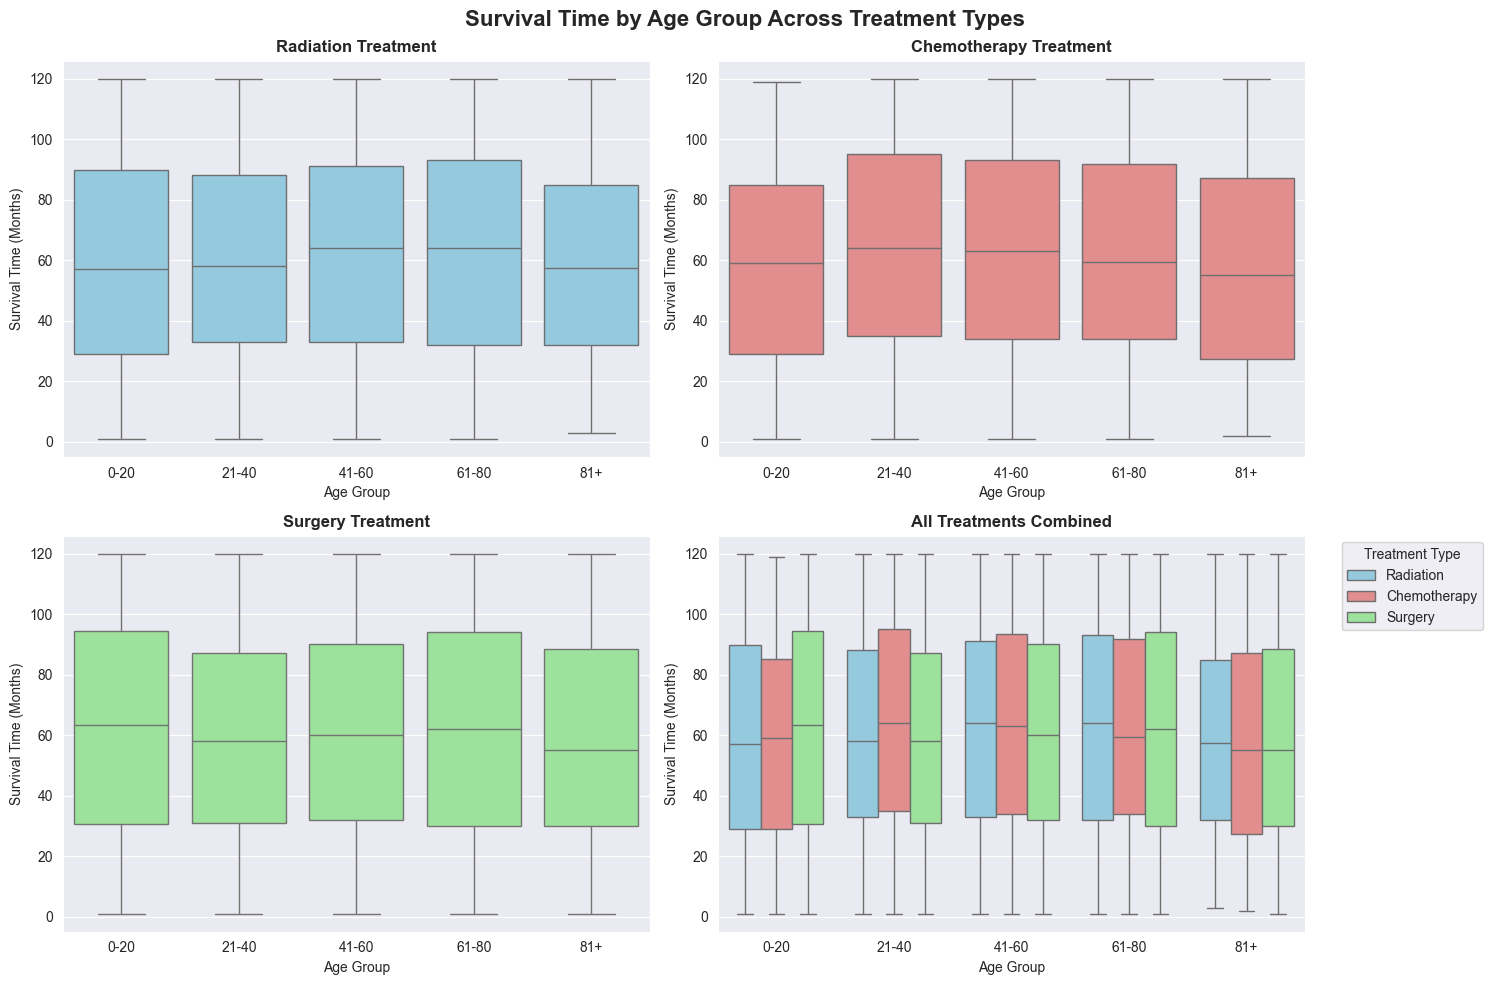

🔍 VISUAL COMPARISON INSIGHTS:
• Compare patterns across the three individual treatment plots
• Look for consistent vs. different age-related trends
• The combined plot shows overall interaction between age, treatment, and survival
• Statistical significance is determined by the ANOVA results above


In [127]:
# Create a comprehensive comparison visualization
plt.figure(figsize=(15, 10))

# Create subplot for all three treatment types
plt.subplot(2, 2, 1)
sns.boxplot(data=radiation_patients, x='Age_Group', y='Survival_Time_Months', color='skyblue')
plt.title('Radiation Treatment', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Survival Time (Months)')

plt.subplot(2, 2, 2)
sns.boxplot(data=chemo_patients, x='Age_Group', y='Survival_Time_Months', color='lightcoral')
plt.title('Chemotherapy Treatment', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Survival Time (Months)')

plt.subplot(2, 2, 3)
sns.boxplot(data=surgery_patients, x='Age_Group', y='Survival_Time_Months', color='lightgreen')
plt.title('Surgery Treatment', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Survival Time (Months)')

# Combined plot for direct comparison
plt.subplot(2, 2, 4)
sns.boxplot(data=eye_cancer_df, x='Age_Group', y='Survival_Time_Months', 
           hue='Treatment_Type', palette=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('All Treatments Combined', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Survival Time (Months)')
plt.legend(title='Treatment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Survival Time by Age Group Across Treatment Types', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("🔍 VISUAL COMPARISON INSIGHTS:")
print("• Compare patterns across the three individual treatment plots")
print("• Look for consistent vs. different age-related trends")
print("• The combined plot shows overall interaction between age, treatment, and survival")
print("• Statistical significance is determined by the ANOVA results above")

#### **Conclusion**

> Testing each `Treatment Type` **One-Way ANOVA** across `Age Group` shows no **statistical significance** with a `p-value` of **0.05**. This means that there are little variance in each of the means of the Age Groups per Treatment Type. This may pertain to improving quality of treatment type giving equal chances of survival even among the elderly population suffering from eye cancer.